# 主成分分析PCA
---
主成分分析是一种常用的无监督学习方法, 这一方法利用正交变换把由**线性相关**变量表示的观测数据转换为少数几个由**线性无关**变量表示的数据, 线性无关的变量称为**主成分**.主成分的个数通常小于原始变量的个数, 所以主成分分析属于**降维**方法
> 所谓线性相关的$x_1$和$x_2$就是说知道$x_1$的值的情况下，$x_2$的预测不是完全随机的

## 总体主成分分析
### 基本想法
数据的变量之间可能存在相关性, 以致增加分析的难度.于是, 考虑由少数不相关的变量(新变量), 用来表示数据, 并且要求能保留数据中的大部分信息.
1. 对数据进行规范化: 不同变量可能有不同的量纲，直接求主成分有时会产生不合理的结果。常对各个随机变量实施规范化，使其均值为0，方差为1。
1. 正交变换: 将原来线性相关变量表示的数据,通过正交变换成若干个线性无关的新变量表示的数据. 新变量是可能的正交变换中变量的**方差的和**(信息保存)最大的

### 定义
假设m维变量$\boldsymbol x = (x_1, x_2, \cdots, x_m)^T$, 其均值向量
$$\boldsymbol\mu = E(\boldsymbol x) = (\mu_1, \mu_2, \cdots, \mu_m)$$
协方差矩阵
$$\Sigma = cov(\boldsymbol x, \boldsymbol x) = E[(\boldsymbol x - \boldsymbol \mu)(\boldsymbol x - \boldsymbol \mu)^T]$$
将$\boldsymbol x$线性变换到$\boldsymbol y = (y_1, y_2, \cdots, y_m)^T$
$$y_i = \alpha_i^T \boldsymbol x = \alpha_{1i} x_1 + \alpha_{2i} x_2 + \cdots + \alpha_{mi} x_m $$
其中$\alpha_i^T = (\alpha_{1i}, \alpha_{2i}, \cdots, \alpha_{mi}) \quad i=1, 2, \cdots, m$

由随机变量的性质可知,
$$E(y_i) = \alpha_i^T\boldsymbol x,  \\ 
var(y_i) = \alpha_i^T\Sigma\alpha_i, \\
cov(y_i, y_j) = \alpha_i^T\Sigma\alpha_j, \\
$$
总体主成分定义: 给定一个 $y_i$的线性变换, 如果他们满足条件
1. 系数向量$\alpha_i^T$是单位向量, 即$\alpha_i^T \alpha_i = 1$(正交变换), 
1. 变量$y_i$与变量$y_j$互不相关, 即$cov(y_i, y_j) = 0$,
1. 变量$y_1$是$\boldsymbol x$的所有线性变换中方差最大的(第一主成分), $y_2$是与$y_1$不相关的x的所有线性变换中方差最大的(第二主成分), ...

### 主要性质
1. $x$的第k主成分的方差是$$var(y_k) = \alpha_k^T\Sigma\alpha_k = \lambda_k$$,即协方差矩阵$\Sigma$的第k个特征值
1. y = A^Tx , A为正交矩阵($A^T = A^{-1}$)
$$A = \begin{bmatrix}\alpha_{11}& \alpha_{12}& \cdots& \alpha_{1m} \\
\alpha_{21}& \alpha_{22}& \cdots& \alpha_{2m} \\
\vdots& \vdots&  & \vdots \\
\alpha_{m1}& \alpha_{m2}& \cdots& \alpha_{mm}
\end{bmatrix}$$
1. 总体主成分y的协方差矩阵为对角矩阵$$\mathrm{cov}(\boldsymbol{y})=\Lambda=\mathrm{diag}(\lambda_1,\lambda_2,\cdots,\lambda_m)$$
1. 总体主成分y的方差之和等于随机变量x的方差之和$$\sum\limits_{i=1}^m\lambda_i=\sum\limits_{i=1}^m\sigma_{ii}$$
 $\sigma_{ii}$是随机变量$x_i$的方差, 即协方差矩阵$\Sigma$的对角元素
$$\sum\limits_{i=1}^m \mathrm{var}(x_i)=\mathrm{tr}(\mit{\Sigma}^\mathrm{T}\mathrm)=tr\mathrm(A\Lambda A^\mathrm{T}\mathrm)=\mathrm{tr}\mathrm(\Lambda\mathrm)=\sum\limits_{i=1}^m\lambda_i=\sum\limits_{i=1}^m \mathrm{var}\mathrm(y_i\mathrm)$$
1. 因子负荷量(factor loading),
$$\rho(y_k, x_i)=\frac {\sqrt{\lambda_k}\alpha_{ik}}{\sqrt{\sigma_{ii}}}$$,表示第k个主成分和变量$x_i$的相关系数.
当$\rho(y_k, x_i)>0$时代表$y_k与x_i正相关, x_i越大, y_i就越大$, 小于零代表负相关, 等于零表示不相关

    第k个主成分$y_k$与m个变量的因子负荷量满足
    $$\sum_{i=1}^m \sigma_{ii}\rho^2(y_k, x_i) = \lambda_k $$
    m个主成分与第i个变量的$x_i$的因子负荷量满足
    $$
    \sum_{k=1}^m \rho^2(y_k, x_i) = 1
    $$

### 主成分的个数
主成分分析的主要目的是降维, 所以一般选择$k(k << m)$个主成分(线性无关变量)来代替m个原有变量(线性相关变量)使得问题简化, 并能保留原有变量的大部分信息(方差).
将x从m维变换到q维的正交线性变化
 $$y = B^Tx$$
当B为x的前q个主成分时, 能最大限度地保留原有变量方差的信息.

**方差贡献率**: 第k主成分的方差贡献率定义为$y_k$的方差与所有方差之和的比
$$\eta_k = \frac {\lambda_k}{\sum_{i=1}^m \lambda_i}$$
**累计方差贡献率**:
$$\sum_{i=1}^k\eta_i = \frac {\sum_{i=1}^k\lambda_i}{\sum_{i=1}^m \lambda_i}$$
通常取k使得累计方差贡献率达到规定的百分比以上.

k个主成分$y_1, y_2, \cdots, y_k$对原有变量$x_i$的贡献率($x_i$保留信息的比例)
$$\nu_i = \rho^2(x_i, (y_1, y_2, \cdots, y_k)) = \sum_{j=1}^k \rho^2(x_i, y_j) = \sum_{j=1}^k \frac {\lambda_j\alpha_{ij}^2}{\sigma_{ii}}$$

### 规范化变量的总体主成分
这部分内容描述了规范化随机变量的总体主成分的性质，概括下就是：特征值，特征值的和，特征变量，特征变量按行求和; 特征变量按列求和。
1. 对随机变量进行规范化, 使其均值为0, 方差为1 $$x_i^* = \frac {x_i - E(x_i)}{\sqrt{var(x_i)}}$$
1. $\Lambda^*=\mathrm{diag}(\lambda_1^*, \lambda_2^*, \cdots, \lambda_m^*)$
1. $\sum\limits_{k=1}^m \lambda_k^*=m$
1. $\rho(y_k^*, x_i^*)=\sqrt{\lambda_k^*}e_{ik}^*, k,i=1,2,\cdots,m$
1. $\sum\limits_{i=1}^m\rho^2(y_k^*,x_i^*)=\sum\limits_{i=1}^m\lambda_k^*e_{ik}^{*2}=\lambda_k^*,k=1,2,\cdots,m$
1. $\sum\limits_{k=1}^m\rho^2(y_k^*,x_i^*)=\sum\limits_{k=1}^m\lambda_k^*e_{ik}^{*2}=1,i=1,2,\cdots,m$

## 样本主成分分析
在观测数据上进行主成分分析就是样本主成分分析.
- 样本矩阵
$$X = \begin{bmatrix} \boldsymbol x_1 & \boldsymbol x_2&  \cdots& \boldsymbol x_n\end{bmatrix}$$
其中$\boldsymbol x_j = (x_{1j}, x_{2j}, \cdots, x_{mj})^T$表示第$j$个观测样本.

- 样本均值向量
$$\bar x = \frac 1 n \sum_{j=1}^n \boldsymbol x_j$$
- 样本协方差矩阵
$$S = [s_{ij}]_{m \times m} \\ 
s_{ij} = \frac 1 {n-1}\sum_{k=1}^n(x_{ik} - \bar x_i)(x_{jk} - \bar x_j)
$$
其中$\bar x_i = \frac 1 n sum_{k=1}^n x_{ik}$为第i个变量的样本均值.
- 样本相关矩阵$R$为
$$R = [r_{ij}]_{m\times m}, \quad r_{ij} = \frac {s_{ij}} {\sqrt{s_{ii}s_{jj}}}, \quad i,j= 1, 2, \cdots, m$$
- 线性变换后的m维向量$\boldsymbol y$ 
$$ y_i = \alpha_i^T\boldsymbol x$$
$y_i$的样本均值为
$$\bar y_i = \frac 1 n \sum_{j=1}\alpha_i^T\boldsymbol x_j = \alpha_i^T \bar x$$
- $y_i$的样本方差
$$var(y_i) = \frac 1{n-1}\sum_{j=1}^n(\alpha_i^Tx_j - \alpha_i^T\bar x)^2 = \alpha_i^TS\alpha_i$$

- 任意两个线性变换$y_i$和$y_k$的样本协方差
$$cov(y_i, y_k)=\alpha_i^TS\alpha_k$$
- 规范化后的样本矩阵仍记作X,这是样本协方差矩阵S就是样本相关矩阵R
$$R = \frac 1 {n-1} XX^T$$

### 相关矩阵的特征值分解算法
1. 对样本数据进行规范化处理, 样本矩阵仍记为X
$$x_{ij}^* = \frac {x_{ij} - \bar x_i}{\sqrt{s_{ii}}} \\
\bar x_i = \frac 1 n \sum_{j=1}^nx_{ij} \\
s_{ii} = \frac 1 {n-1} \sum_{j=1}^n(x_{ij} - \bar x_i)^2
$$
1. 计算样本相关矩阵R
$$R= [r_{ij}]_{m\times m} \frac 1 {n-1} XX^T \\ r_{ij} = \frac 1 {n-1} \sum_{l=1}^nx_{il}x_{lj}$$
1. 求样本相关矩阵R的k个特征值和对应的k个单位特征向量. 特征方程
$$|R - \lambda I| = 0$$求解得到m个特征值
$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_m$$
求累计方差贡献率$\sum_{i=1}^k\eta_i$达到预定值的主成分个数k.
再求前k个特征值对应的单位特征向量
$$\alpha_i = (\alpha_1i, \alpha_2i, \cdots, \alpha_mi)^T$$
1. 求k个样本主成分  
以k个单位特征向量为系数进行线性变换$$y_i = \alpha_i^Tx$$
1. 计算k个主成分$y_j$与原变量$x_i$的相关系数$\rho(x_i, y_j)$(因子负荷量),
$$\rho(y_k, x_i)=\sqrt{\lambda_k}e_{ik}, k,i=1,2,\cdots,m$$
以及k个主成分对原变量$x_i$的贡献率$\nu_i$
$$
\nu_i=\rho^2(x_i,(y_1, y_2, \cdots,y_k))=\sum_{j=1}^k\rho^2(x_i,y_j)=\sum_{j=1}^k\lambda_ja_{ij}^2\\
i=1,2,\cdots,m
$$
1. 计算n个样本的主成分值  
将规范化样本数据带入k个主成分值, 得到n个样本的主成分值
$$
y_{ij}=(a_{1i},a_{2i},\cdots,a_{mi})(x_{1j},x_{2j},\cdots,x_{mj})^\mathrm{T}=\sum\limits_{l=1}^m a_{li}x_{lj}\\
i=1,2,\cdots,m, j=1,2,\cdots,n
$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

**例16.1**

In [13]:
# 规范后相关矩阵
R = np.array([[1, 0.44, 0.229, 0.33], [0.44, 1 , 0.35, 0.32],
              [0.29, 0.35, 1, 0.6], [0.33, 0.32, 0.6, 1]])

In [17]:
lambda_, Q = np.linalg.eig(R)

In [18]:
# 特征值
lambda_

array([2.15514838, 0.88770169, 0.57042585, 0.38672408])

In [19]:
# 特征向量矩阵
Q

array([[ 0.44208665,  0.60379618,  0.65959827, -0.2750863 ],
       [ 0.47931469,  0.44017854, -0.72282528,  0.21902085],
       [ 0.53516279, -0.48102096, -0.10443631, -0.65206586],
       [ 0.53704526, -0.4585759 ,  0.17761415,  0.67169004]])

In [20]:
# 特征值的和等于维度m
np.sum(lambda_)

4.0

In [31]:
np.sqrt(lambda_[0]) * Q[:, 0]

array([0.64900193, 0.70365427, 0.78564164, 0.7884052 ])

In [22]:
# 取75%累计方差贡献率 等到k =2 
# y1 = Q[:, 0]x, y2 = Q[:, 1]x

# 因子负荷量 k个主成分和变量 x_i 的相关系数. 
# rho = \sqrt(\lambda_k)\alpha_ik
rho = np.sqrt(lambda_[:2]) * Q[:, :2]
rho

array([[ 0.64900193,  0.56888422],
       [ 0.70365427,  0.41472708],
       [ 0.78564164, -0.45320795],
       [ 0.7884052 , -0.43206069]])

In [25]:
# y1, y2对x_i的贡献率 vu = rho^2
vu = np.sum(rho ** 2, axis=1)
vu

array([0.74483276, 0.66712788, 0.82263024, 0.8082592 ])

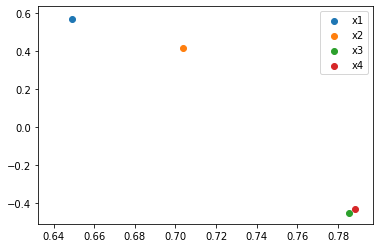

In [29]:
# 因子负荷量分布图
for i in range(4):
    plt.scatter(rho[i, 0], rho[i, 1], label=f'x{i+1}')
plt.legend()

$y_1$是原始特征的线性组合，并且，各个原始特征的权重(系数)基本相同，说明大家同样重要。$y_1$和总成绩有关系。
$y_2$的贡献可能更多的体现在文理科的差异上，他们的作用相反。

| 类型 | 主成分 | 特征值 | $x_1$ | $x_2$ | $x_3$ | $x_4$ | 方差贡献率 | 备注|
| --- | --- | --- | --- | --- | --- | --- | --- |---|
| 特征向量 |$y_1$| 2.17 | 0.460 | 0.476 | 0.523 | 0.537 | 0.543 ||
| 特征向量 |$y_2$| 0.87 | 0.574 | 0.486 | -0.476 | -0.456 | 0.218 |累计0.761|
| 因子负荷量|$y_1$|2.17|0.678|0.701|0.770|0.791|$\sqrt{\lambda_1}e_{i1}$|平方和=2.169|
| 因子负荷量|$y_2$|0.87|0.536|0.697|0.790|0.806|$\sqrt{\lambda_2}e_{i2}$|平方和=0.870|

### 数据矩阵的奇异值分解算法

关键词：**数据矩阵**，**截断奇异值分解**  
算法16.1 主成分分析法  
输入：$m\times n$样本矩阵$X$，每一行元素均值为0。`这里每一行是一个特征`  
输出：$k\times n$样本主成分矩阵$Y$  
参数：主成分个数$k$  
1. 构造新的$n\times m$矩阵
$$
X^\prime=\frac{1}{\sqrt{n-1}}X^\mathrm{T}
$$
$X^\prime$每一列均值为0，其实就是转置了。
2. 对矩阵$X^\prime$进行截断奇异值分解
$$
X^\prime=U\mit{\Sigma}V^\mathrm{T}
$$
矩阵$V$的前$k$列构成$k$个样本主成分
3. 求$k\times n$样本主成分矩阵
$$
Y=V^\mathrm{T}X
$$

---
## 项目案例: 对半导体数据进行降维处理

### 项目概述
```
半导体是在一些极为先进的工厂中制造出来的。设备的生命早期有限，并且花费极其巨大。
虽然通过早期测试和频繁测试来发现有瑕疵的产品，但仍有一些存在瑕疵的产品通过测试。
如果我们通过机器学习技术用于发现瑕疵产品，那么它就会为制造商节省大量的资金。

具体来讲，它拥有590个特征。我们看看能否对这些特征进行降维处理。

对于数据的缺失值的问题，我们有一些处理方法(参考第5章)
目前该章节处理的方案是：将缺失值NaN(Not a Number缩写)，全部用平均值来替代(如果用0来处理的策略就太差劲了)。
```

In [200]:
def data_preparing():
    data = np.loadtxt('secom.data')
    _, n_features = data.shape
    # 每个特征的NaN值用均值替代
    for i in range(n_features):
        nan_indices = np.isnan(data[:, i])
        mean_data = np.mean(data[~nan_indices, i])
        data[nan_indices, i] = mean_data
        
#         # 标准化
#         std = data[:, i].std()
#         if std == 0:
#             data[:, i] = 0
#         else:
#             data[:, i] = (data[:, i] - mean_data) / std
    return data

def stand_(data):
    _, n_features = data.shape
    data_std = data.copy()
    for i in range(n_features):
        # 标准化
        mean_data = data_std[:, i].mean()
        std = data[:, i].std()
        if std == 0:
            data_std[:, i] = 0
        else:
            data_std[:, i] = (data_std[:, i] - mean_data) / std
    return data_std

In [201]:
data = data_preparing()
data_std = stand_(data)

In [194]:
from sklearn.decomposition import PCA
pca = PCA(6)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [195]:
pca.explained_variance_ratio_

array([0.0556, 0.0362, 0.0282, 0.0253, 0.022 , 0.0208])

In [218]:
class PCA1:
    # 使用特征值分解的方法
    def __init__(self, n_components):
        self.n_components = n_components
    
    def fit(self, X):
        # 使用特征值分解的方法
        # X array-like shape(n_samples, n_features)
        # 相关矩阵
        n_samples, n_features = X.shape
        # 规范化时 除以n, 这里也除以n
        R = np.dot(X.T, X) / n_features  # n_features * n_features

        # 求相关矩阵R的k个特征值和k个单位特征向量
        eigenvalues_, eigenvectors_ = np.linalg.eig(R)
        
        self.eigenvalues_ = np.real(eigenvalues_)
        self.eigenvectors_ = np.real(eigenvectors_)
        
        # 第k主成分的方差
        self.explained_variance_ = self.eigenvalues_
        # 方差贡献率
        self.explained_variance_ratio_ = self.eigenvalues_ / np.sum(self.eigenvalues_)
        
    def fit_transform(self, X):
        # X array-like shape(n_samples, n_features)
        self.fit(X)
        return self.transform(X)
    
    def transform(self, X):
        # k*n_features  n_features*n_samples 
        return np.dot(self.eigenvectors_[:, :self.n_components].T, X.T)

In [219]:
pca1 = PCA1(n_components=6)
pca1.fit_transform(data_std)

array([[ 1.6883,  2.2321, -0.4147, ...,  1.1219,  1.1428, -2.0069],
       [-2.8817, -0.7943, -1.1289, ...,  1.4987,  3.1285,  2.8508],
       [-3.7875, -2.8072, -1.2519, ...,  1.2691,  3.4476,  2.332 ],
       [-2.6559, -2.0989, -0.4541, ...,  1.1545,  3.2299,  3.905 ],
       [ 0.651 ,  0.6133, -0.3436, ...,  0.4895, -0.4285, -0.8127],
       [-1.1792, -1.5667,  2.2607, ..., -2.162 ,  3.0725,  3.8516]])

In [220]:
pca1.explained_variance_ratio_[:150].sum()

0.9254164077785221

In [221]:
pca1.eigenvectors_[:, :6]

array([[ 0.0059,  0.0242,  0.0089,  0.0088, -0.0148, -0.0135],
       [ 0.    , -0.0127,  0.0034,  0.0081,  0.0123,  0.0046],
       [ 0.0039, -0.0093,  0.008 ,  0.0135, -0.0011, -0.0003],
       ...,
       [ 0.0004, -0.0215, -0.0023,  0.0114,  0.0013,  0.04  ],
       [ 0.0001, -0.0178, -0.0025,  0.011 ,  0.0031,  0.036 ],
       [-0.015 , -0.0177,  0.0093,  0.0034, -0.008 ,  0.0223]])

In [212]:
class PCA2:
    # 奇异值分解
    def __init__(self, n_components):
        self.n_components = n_components
    def fit(self, X):
        n_samples, n_features = X.shape
        X_ = X / np.sqrt(n_samples)
        U, Sigma, Vt = np.linalg.svd(X_)
        
        self.eigenvalues_ = Sigma ** 2
        self.eigenvectors_ = Vt
        # 第k主成分的方差
        self.explained_variance_ = self.eigenvalues_
        # 方差贡献率
        self.explained_variance_ratio_ = self.eigenvalues_ / np.sum(self.eigenvalues_)
    
    def fit_transform(self, X):
        # X array-like shape(n_samples, n_features)
        self.fit(X)
        return self.transform(X)
    
    def transform(self, X):
        # k*n_features  n_features*n_samples 
        return np.dot(self.eigenvectors_[:, :self.n_components], X.T)

In [213]:
pca2 = PCA2(6)
pca2.fit(data_std) 

In [216]:
pca2.explained_variance_ratio_[:6]

array([0.0556, 0.0362, 0.0282, 0.0253, 0.022 , 0.0208])

In [217]:
pca2.eigenvectors_[:, :6]

array([[-0.0059, -0.    , -0.0039,  0.0024,  0.0008, -0.    ],
       [ 0.0242, -0.0127, -0.0093,  0.033 ,  0.0086,  0.    ],
       [ 0.0089,  0.0034,  0.008 ,  0.0254,  0.0213, -0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.    , -0.    ],
       [ 0.    ,  0.    , -0.    ,  0.    , -0.    , -0.    ],
       [ 0.    , -0.    , -0.    ,  0.    , -0.    ,  0.027 ]])